# ExoClick Technical Test

## Objectives






In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Initial Assessment 

In [354]:
# Import data as dataframe: 

df = pd.read_csv(r'C:\Users\pablo\Desktop\ExoClick\data_test2.csv')

In [355]:
df.head(10)

,dattime,client,country,ad_type,total_impressions,total_value
0,2021-06-06*06:00:00,1,EST,15,137.0,1.370000e-01
1,2021-06-12*22:00:00,2,KEN,15,4424.0,9.172066e+10
2,2021-06-05*20:00:00,1,NCL,15,271.0,2.710000e-01
3,2021-06-23*17:00:00,1,EST,17,1.0,1.000000e-03
4,2021-06-02*10:00:00,3,NCL,15,11701.0,4.871900e+00
5,2021-06-11*16:00:00,4,KEN,15,1496.0,3.082000e-01
6,2021-06-19*08:00:00,5,KEN,17,16.0,1.600000e-01
7,2021-06-20*03:00:00,6,KEN,17,1.0,2.450000e-02
8,2021-06-03*21:00:00,7,NCL,17,8.0,1.840000e-01
9,2021-06-21*15:00:00,8,KEN,17,1.0,2.000000e-03


In [356]:
df.tail(10)

,dattime,client,country,ad_type,total_impressions,total_value
96213,2021-06-20*20:00:00,19,NCL,10,125.0,0.625000
96214,2021-06-21*16:00:00,2,KEN,2,3269.0,69.681281
96215,2021-06-01*04:00:00,17,KEN,10,10.0,0.050000
96216,2021-06-17*14:00:00,10,NCL,10,296.0,0.158500
96217,2021-06-19*23:00:00,24,ISL,2,14.0,0.070000
96218,2021-06-21*17:00:00,39,EST,2,15.0,0.170939
96219,2021-06-05*22:00:00,3,KEN,10,162.0,0.099900
96220,2021-06-26*02:00:00,23,ISL,10,11.0,0.115894
96221,2021-06-16*22:00:00,18,EST,17,6.0,0.035000
96222,2021-06-03*17:00:00,3,NCL,10,22200.0,11.873900


### Columns dictionary
Dataframe conformed by 6 columns:

- datetime: Date and hour in the format date*hour
- client: Client identifier
- country: ISO3 country code
- ad_type: Ad type identifier
- impressions: Number of ad impressions
- value: Total value in cents paid by the client for those impressions

In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96223 entries, 0 to 96222
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dattime            96223 non-null  object 
 1   client             96223 non-null  int64  
 2   country            96223 non-null  object 
 3   ad_type            96223 non-null  int64  
 4   total_impressions  96223 non-null  float64
 5   total_value        96223 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 4.4+ MB


In [358]:
df.describe()

,client,ad_type,total_impressions,total_value
count,96223.000000,96223.000000,96223.000000,9.622300e+04
mean,16.665174,11.487773,4045.099815,9.532133e+05
std,14.327396,5.057308,31901.013999,2.956839e+08
min,1.000000,2.000000,-19634.000000,0.000000e+00
25%,4.000000,10.000000,7.000000,2.010000e-02
50%,13.000000,10.000000,42.000000,1.400000e-01
75%,25.000000,17.000000,378.000000,1.104459e+00
max,73.000000,17.000000,941289.000000,9.172066e+10


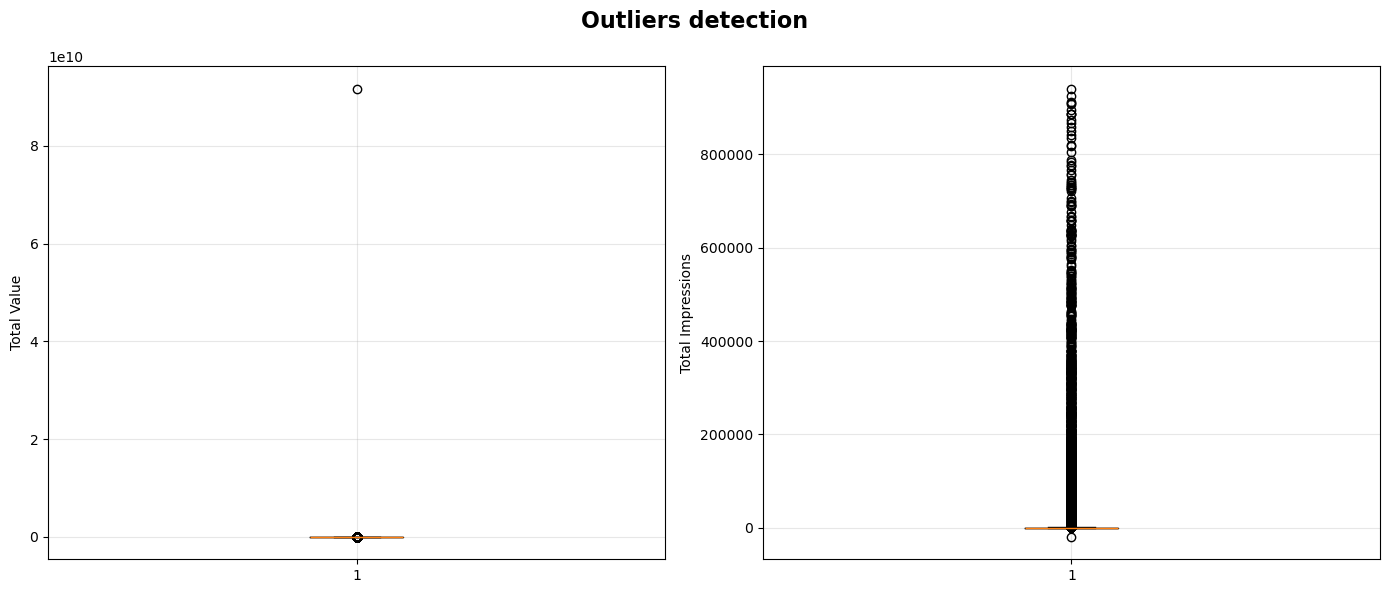

In [359]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot total_value
ax[0].boxplot(df['total_value'])
ax[0].set_ylabel('Total Value')
ax[0].grid(alpha=0.3)

# Boxplot total_impressions
ax[1].boxplot(df['total_impressions'])
ax[1].set_ylabel('Total Impressions')
ax[1].grid(alpha=0.3)

plt.suptitle('Outliers detection', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [360]:
print(df['client'].unique())
print('Total of clients:', len(df['client'].unique()))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 53 58 50 52 57 55 62 59 51 63 54 64 65 66 60 56 67 68 69 70 61 71 72
 73]
Total of clients: 73


In [361]:
print(df['country'].unique())

['EST' 'KEN' 'NCL' 'ISL' 'ISL1' 'NCLNCL']


In [362]:
print(df['ad_type'].unique())

[15 17 10  2]


In [363]:
#check for missing values

df.isnull().any()

#no missing values

dattime              False
client               False
country              False
ad_type              False
total_impressions    False
total_value          False
dtype: bool

### Data malfunctions found in the Initial Assessment

- `Dattime` needs to be changed to datetime format
- `Dattime` column name needs to be changed
- `total impressions` has negative values of 
- Some variables are not in a correct format
    - `ad type`, `client` and `country` should be a category
    - `total impressions` should be an integer
- `Country` categories has spelling issues
- `total value` has an outlier

These requeriments will be assessed in the next section. 

# 2. Data cleaning

### 2.1. Date time format and column name

In [364]:
df['dattime'] #format='%Y-%m-%d*%H:%M:%S'

0        2021-06-06*06:00:00
1        2021-06-12*22:00:00
2        2021-06-05*20:00:00
3        2021-06-23*17:00:00
4        2021-06-02*10:00:00
                ...         
96218    2021-06-21*17:00:00
96219    2021-06-05*22:00:00
96220    2021-06-26*02:00:00
96221    2021-06-16*22:00:00
96222    2021-06-03*17:00:00
Name: dattime, Length: 96223, dtype: object

In [365]:
#transform date time in pandas format

df['dattime'] = pd.to_datetime(df['dattime'], format='%Y-%m-%d*%H:%M:%S')

In [366]:
df = df.rename(columns={'dattime': 'datetime'})
df

,datetime,client,country,ad_type,total_impressions,total_value
0,2021-06-06 06:00:00,1,EST,15,137.0,1.370000e-01
1,2021-06-12 22:00:00,2,KEN,15,4424.0,9.172066e+10
2,2021-06-05 20:00:00,1,NCL,15,271.0,2.710000e-01
3,2021-06-23 17:00:00,1,EST,17,1.0,1.000000e-03
4,2021-06-02 10:00:00,3,NCL,15,11701.0,4.871900e+00
...,...,...,...,...,...,...
96218,2021-06-21 17:00:00,39,EST,2,15.0,1.709390e-01
96219,2021-06-05 22:00:00,3,KEN,10,162.0,9.990000e-02
96220,2021-06-26 02:00:00,23,ISL,10,11.0,1.158940e-01
96221,2021-06-16 22:00:00,18,EST,17,6.0,3.500000e-02


### 2.2. Negative values in Total Impressions

In [367]:
df[df['total_impressions'] < 0]

,datetime,client,country,ad_type,total_impressions,total_value
87,2021-06-15 03:00:00,4,EST,15,-19634.0,8.4741


In [368]:
# Check for similar entries to decide if it is possible to delete the row

df[(df['client']==4) & (df['ad_type']==15) & (df['country']=='EST')].sort_values(by='datetime')

,datetime,client,country,ad_type,total_impressions,total_value
38269,2021-06-01 00:00:00,4,EST,15,11791.0,5.5461
25330,2021-06-01 02:00:00,4,EST,15,11885.0,6.4113
19874,2021-06-01 06:00:00,4,EST,15,14596.0,7.1502
10596,2021-06-01 10:00:00,4,EST,15,16304.0,8.1966
1180,2021-06-01 16:00:00,4,EST,15,24289.0,11.5780
...,...,...,...,...,...,...
11273,2021-06-29 18:00:00,4,EST,15,10119.0,2.7341
22580,2021-06-29 19:00:00,4,EST,15,6016.0,1.6207
26352,2021-06-29 21:00:00,4,EST,15,3261.0,0.8267
20184,2021-06-29 22:00:00,4,EST,15,3153.0,0.7921


In [369]:
# Remove the column with negative values since it is just 1 entry

df = df.drop(df[df['total_impressions'] < 0].index)

In [370]:
df[df['total_impressions'] < 0] 

,datetime,client,country,ad_type,total_impressions,total_value


No negative impressions

### 2.3. Outliers

In [371]:
# Remove outlier in total_value

df[df['total_value']==df['total_value'].max()].index

Index([1], dtype='int64')

In [372]:
df = df.drop(df[df['total_value']==df['total_value'].max()].index)

<Axes: >

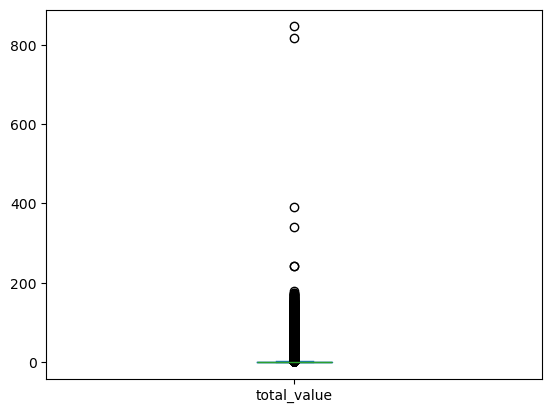

In [406]:
# Boxplot total_value

df['total_value'].plot(kind='box')

### 2.4. Duplicates

In [374]:
# Check for duplicates

df[df.duplicated(keep=False)].sort_values(by=list(df.columns))


,datetime,client,country,ad_type,total_impressions,total_value
11863,2021-06-01 16:00:00,12,KEN,17,1.0,0.0050
22173,2021-06-01 16:00:00,12,KEN,17,1.0,0.0050
1086,2021-06-01 20:00:00,19,EST,17,10.0,0.0500
26813,2021-06-01 20:00:00,19,EST,17,10.0,0.0500
8567,2021-06-10 01:00:00,1,EST,15,17.0,0.0170
50307,2021-06-10 01:00:00,1,EST,15,17.0,0.0170
15098,2021-06-11 04:00:00,1,EST,10,59.0,0.0590
71627,2021-06-11 04:00:00,1,EST,10,59.0,0.0590
2758,2021-06-11 09:00:00,12,EST,17,6.0,0.0180
63445,2021-06-11 09:00:00,12,EST,17,6.0,0.0180


In [375]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 22


In [376]:
# Remove duplicates

df = df.drop_duplicates()

In [377]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


### 2.5. Data quality

In [378]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96199 entries, 0 to 96222
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   datetime           96199 non-null  datetime64[ns]
 1   client             96199 non-null  int64         
 2   country            96199 non-null  object        
 3   ad_type            96199 non-null  int64         
 4   total_impressions  96199 non-null  float64       
 5   total_value        96199 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 5.1+ MB


In [379]:
# change total_impressions to a int64 since it represents a discrete value
#fist, check if there are any impression with decimals:
df[df['total_impressions'] % 1 != 0]


,datetime,client,country,ad_type,total_impressions,total_value
4005,2021-06-16 04:00:00,4,ISL,15,4502.5,5.9103


In [380]:
#I decide to remove the row since it is just 1 

df = df.drop(df[df['total_impressions'] % 1 != 0].index)
df

,datetime,client,country,ad_type,total_impressions,total_value
0,2021-06-06 06:00:00,1,EST,15,137.0,0.137000
2,2021-06-05 20:00:00,1,NCL,15,271.0,0.271000
3,2021-06-23 17:00:00,1,EST,17,1.0,0.001000
4,2021-06-02 10:00:00,3,NCL,15,11701.0,4.871900
5,2021-06-11 16:00:00,4,KEN,15,1496.0,0.308200
...,...,...,...,...,...,...
96218,2021-06-21 17:00:00,39,EST,2,15.0,0.170939
96219,2021-06-05 22:00:00,3,KEN,10,162.0,0.099900
96220,2021-06-26 02:00:00,23,ISL,10,11.0,0.115894
96221,2021-06-16 22:00:00,18,EST,17,6.0,0.035000


In [381]:
#now transform total impressions into int65:

df['total_impressions'] = df['total_impressions'].astype('Int64')

print(df['total_impressions'].dtype)

Int64


##### Data Quality Issue: Decimal Impressions
- Found 1 row with non-integer impression count (value: [ 4502.5])
- Represents ~0.001% of the dataset (1 out of [total rows])
- Decision: Rounded down using np.floor() because:
  - Only 1 row affected (negligible impact on analysis)
  - Impressions must be whole numbers (can't have fractional ad views)
  - Floor function ensures conservative estimate
- Converted column from float64 to int64 after correction

##### Change data type of Client, Ad type and Country 


In [382]:
# Transform 'client', 'ad_type' and Country to an object:

df['client'] = df['client'].astype('category')

df['ad_type'] = df['ad_type'].astype('category')

df['country'] = df['country'].astype('category')

In [383]:
#Check for the uniqueness in country:

df['country'].unique()

['EST', 'NCL', 'KEN', 'ISL', 'ISL1', 'NCLNCL']
Categories (6, object): ['EST', 'ISL', 'ISL1', 'KEN', 'NCL', 'NCLNCL']

##### Data Quality Issue: Country Spelling errors


In [384]:
df['country'].unique()

['EST', 'NCL', 'KEN', 'ISL', 'ISL1', 'NCLNCL']
Categories (6, object): ['EST', 'ISL', 'ISL1', 'KEN', 'NCL', 'NCLNCL']

In [385]:
df[df['country'] == 'ISL1']

,datetime,client,country,ad_type,total_impressions,total_value
4397,2021-06-02 15:00:00,21,ISL1,17,6,0.031105


In [386]:
df[df['country'] == 'NCLNCL']

,datetime,client,country,ad_type,total_impressions,total_value
89382,2021-06-17 03:00:00,12,NCLNCL,10,13,0.037


In [387]:
df['country'] = df['country'].replace('ISL1', 'ISL')
df['country'] = df['country'].replace('NCLNCL', 'NCL')

C:\Users\pablo\AppData\Local\Temp\ipykernel_20376\697267032.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['country'] = df['country'].replace('ISL1', 'ISL')
C:\Users\pablo\AppData\Local\Temp\ipykernel_20376\697267032.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['country'] = df['country'].replace('NCLNCL', 'NCL')


In [388]:
df['country'].unique()

['EST', 'NCL', 'KEN', 'ISL']
Categories (4, object): ['EST', 'ISL', 'KEN', 'NCL']

In [389]:
#final check of the data:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96198 entries, 0 to 96222
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   datetime           96198 non-null  datetime64[ns]
 1   client             96198 non-null  category      
 2   country            96198 non-null  category      
 3   ad_type            96198 non-null  category      
 4   total_impressions  96198 non-null  Int64         
 5   total_value        96198 non-null  float64       
dtypes: Int64(1), category(3), datetime64[ns](1), float64(1)
memory usage: 3.3 MB


In [390]:
df = df.reset_index()


In [391]:
df

,index,datetime,client,country,ad_type,total_impressions,total_value
0,0,2021-06-06 06:00:00,1,EST,15,137,0.137000
1,2,2021-06-05 20:00:00,1,NCL,15,271,0.271000
2,3,2021-06-23 17:00:00,1,EST,17,1,0.001000
3,4,2021-06-02 10:00:00,3,NCL,15,11701,4.871900
4,5,2021-06-11 16:00:00,4,KEN,15,1496,0.308200
...,...,...,...,...,...,...,...
96193,96218,2021-06-21 17:00:00,39,EST,2,15,0.170939
96194,96219,2021-06-05 22:00:00,3,KEN,10,162,0.099900
96195,96220,2021-06-26 02:00:00,23,ISL,10,11,0.115894
96196,96221,2021-06-16 22:00:00,18,EST,17,6,0.035000


In [392]:
df = df.drop(columns=['index'])

In [393]:
df

,datetime,client,country,ad_type,total_impressions,total_value
0,2021-06-06 06:00:00,1,EST,15,137,0.137000
1,2021-06-05 20:00:00,1,NCL,15,271,0.271000
2,2021-06-23 17:00:00,1,EST,17,1,0.001000
3,2021-06-02 10:00:00,3,NCL,15,11701,4.871900
4,2021-06-11 16:00:00,4,KEN,15,1496,0.308200
...,...,...,...,...,...,...
96193,2021-06-21 17:00:00,39,EST,2,15,0.170939
96194,2021-06-05 22:00:00,3,KEN,10,162,0.099900
96195,2021-06-26 02:00:00,23,ISL,10,11,0.115894
96196,2021-06-16 22:00:00,18,EST,17,6,0.035000


### 6. Features

- Add a new column with the eCPM - effective Cost Per Mille

In [394]:
def calculate_ecpm(row):
    '''
    Calculate eCPM (effective Cost Per Mille).
    
    eCPM = (total_value / total_impressions) * 1000
    
    Parameters:
    -----------
    row : pandas.Series
        A row from the DataFrame containing 'total_value' and 'total_impressions'
    
    Returns:
    --------
    float
        eCPM value in cents per thousand impressions, or 0 if impressions = 0'''
    
    if row['total_impressions'] > 0:
        return (row['total_value'] / row['total_impressions']) * 1000
    else:
        return 0

In [ ]:
df['eCPM'] = df.apply(calculate_ecpm, axis=1)

,datetime,client,country,ad_type,total_impressions,total_value,eCPM
34941,2021-06-15 15:00:00,4,NCL,15,20,18.968400,948.420000
25563,2021-06-29 06:00:00,51,NCL,15,650,390.000000,600.000000
58772,2021-06-29 07:00:00,51,NCL,2,1410,846.000000,600.000000
95316,2021-06-29 06:00:00,51,NCL,10,570,342.000000,600.000000
16825,2021-06-29 07:00:00,51,NCL,17,1363,817.800000,600.000000
78005,2021-06-29 11:00:00,70,EST,10,201,40.200000,200.000000
68173,2021-06-29 11:00:00,70,ISL,17,4,0.800000,200.000000
6827,2021-06-29 11:00:00,70,KEN,17,15,3.000000,200.000000
42396,2021-06-29 11:00:00,70,NCL,10,308,61.600000,200.000000
61466,2021-06-29 11:00:00,70,NCL,17,14,2.800000,200.000000


In [396]:
df.head()

,datetime,client,country,ad_type,total_impressions,total_value,eCPM
0,2021-06-06 06:00:00,1,EST,15,137,0.1370,1.000000
1,2021-06-05 20:00:00,1,NCL,15,271,0.2710,1.000000
2,2021-06-23 17:00:00,1,EST,17,1,0.0010,1.000000
3,2021-06-02 10:00:00,3,NCL,15,11701,4.8719,0.416366
4,2021-06-11 16:00:00,4,KEN,15,1496,0.3082,0.206016


In [397]:
# Save the new dataset 
df.to_csv('data_test2_clean.csv', index=False)